In [2]:
import pandas as pd
import numpy as np
from unidecode import unidecode
import math
import matplotlib.pyplot as plt

In [108]:
df_escolas = pd.read_csv('escolas.csv', encoding='utf-8')
df_mat_didatico = pd.read_csv('material_didatico.csv', encoding='utf-8')
df_sub_pref = pd.read_csv('subprefeituras.csv', encoding='utf-8')

### Realizando transformações e preparando os dados

Como padrão dos dados, considere:
- nome das colunas em snake_case
- strings não devem conter acentos
- todas as strings devem estar em maiúsculo
- padronização do nome dos logradouros sem abreviação (Ex: R. deve estar como Rua)
- latitude e longitude devem conter apenas 5 casas decimais
- os ids da escola devem todos ser strings com 3 caracteres (Ex: '024')

In [109]:
df_escolas_columns = df_escolas.columns

In [110]:
# Transformando as colunas em snake_case e em minúsculo
df_escolas_columns_snake = [unidecode(x).replace(" ", "").lower() for x in df_escolas_columns]

In [111]:
df_escolas_columns_snake

['id', 'escolas_postos', 'bairro', 'endereco', 'lat', 'lon']

In [112]:
novos_nomes_colunas = dict(zip(df_escolas.columns, df_escolas_columns_snake))
df_escolas = df_escolas.rename(columns=novos_nomes_colunas)
df_escolas

,id,escolas_postos,bairro,endereco,lat,lon
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,"-22,889574","-43,236202"
2,483,EM CELESTINO SILVA,CENTRO,"R. do Lavradio, 56","-22,909293","-43,183579"
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,Praça Argentina 20,"-22,897629","-43,227456"
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,Praça Condessa Paulo de Frontin 45,"-22,924412","-43,208579"
...,...,...,...,...,...,...
147,474,EM ENGENHEIRO GASTÃO RANGEL,GUARATIBA,Estrada Do Magarça 9.183,"-22,98046","-43,643545"
148,301,EM JONATAS SERRANO,GUARATIBA,"Estrada Do Mato Alto, S/Nº","-22,953163","-43,577409"
149,215,E.M. NARCISA AMALIA,ILHA DE GUARATIBA,Estrada Teodoreto de Camargo S/N.º,"-23,009084","-43,537582"
150,606,EM PROFESSOR CASTILHO,ILHA DE GUARATIBA,Caminho da Matriz 4406,"-22,994124","-43,593683"


In [113]:
# Transformando os ids em 3 dígitos com zero à esquerda
df_escolas['id'] = [str(id_).zfill(3) for id_ in df_escolas['id']]
df_escolas['id'].unique()

array(['178', '634', '483', '476', '132', '017', '055', '490', '600',
       '089', '387', '331', '450', '558', '413', '540', '309', '268',
       '523', '035', '011', '226', '638', '126', '180', '163', '361',
       '280', '060', '587', '653', '660', '382', '217', '378', '429',
       '025', '373', '624', '157', '020', '117', '502', '351', '135',
       '388', '440', '259', '422', '041', '537', '230', '379', '146',
       '566', '498', '663', '121', '161', '263', '118', '140', '260',
       '069', '090', '274', '676', '390', '608', '589', '256', '091',
       '248', '623', '603', '673', '520', '412', '031', '514', '023',
       '415', '016', '570', '528', '414', '690', '202', '550', '211',
       '206', '492', '466', '636', '527', '586', '080', '398', '175',
       '308', '576', '495', '641', '689', '171', '477', '687', '568',
       '399', '255', '262', '616', '320', '144', '534', '342', '052',
       '139', '323', '573', '560', '246', '319', '584', '311', '316',
       '497', '297',

In [114]:
# Removendo acentos no df escolas
df_escolas["escolas_postos"] = df_escolas["escolas_postos"].apply(lambda x: unidecode(x).upper())
df_escolas["bairro"] = df_escolas["bairro"].apply(lambda x: unidecode(x).upper())
df_escolas['endereco'] = df_escolas['endereco'].apply(lambda x: unidecode(x).upper())
df_escolas

,id,escolas_postos,bairro,endereco,lat,lon
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,RUA CARLOS SEIDL S/NO,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,"-22,889574","-43,236202"
2,483,EM CELESTINO SILVA,CENTRO,"R. DO LAVRADIO, 56","-22,909293","-43,183579"
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA 20,"-22,897629","-43,227456"
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN 45,"-22,924412","-43,208579"
...,...,...,...,...,...,...
147,474,EM ENGENHEIRO GASTAO RANGEL,GUARATIBA,ESTRADA DO MAGARCA 9.183,"-22,98046","-43,643545"
148,301,EM JONATAS SERRANO,GUARATIBA,"ESTRADA DO MATO ALTO, S/NO","-22,953163","-43,577409"
149,215,E.M. NARCISA AMALIA,ILHA DE GUARATIBA,ESTRADA TEODORETO DE CAMARGO S/N.O,"-23,009084","-43,537582"
150,606,EM PROFESSOR CASTILHO,ILHA DE GUARATIBA,CAMINHO DA MATRIZ 4406,"-22,994124","-43,593683"


In [115]:
df_escolas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              152 non-null    object
 1   escolas_postos  152 non-null    object
 2   bairro          152 non-null    object
 3   endereco        152 non-null    object
 4   lat             152 non-null    object
 5   lon             152 non-null    object
dtypes: object(6)
memory usage: 7.2+ KB


In [116]:
# Criando a coluna logradouro
df_escolas['logradouro'] = ''
for i in range(len(df_escolas)):
    df_escolas['logradouro'][i] = df_escolas['endereco'][i].split(' ')[0].replace('.' ,'')
    
df_escolas['logradouro'].unique()

array(['RUA', 'R', 'PRACA', 'AVENIDA', 'AV', 'BOULEVARD', 'PCA', 'ESTR',
       'ESTRADA', 'CAMINHO'], dtype=object)

In [117]:
# Padronizando o logradouro com uso de dicionário
mapeamento = {
    'R': 'RUA',
    'AV': 'AVENIDA',
    'PCA': 'PRACA',
    'ESTR': 'ESTRADA',
    'CAMINHO': 'ESTRADA'
}

df_escolas['logradouro'] = df_escolas['logradouro'].replace(mapeamento)
df_escolas['logradouro'].unique()

array(['RUA', 'PRACA', 'AVENIDA', 'BOULEVARD', 'ESTRADA'], dtype=object)

In [118]:
# Criando a coluna número
df_escolas['numero'] = ''
for i in range(len(df_escolas)):
    df_escolas['numero'][i] = df_escolas['endereco'][i].split(' ')[-1]

In [119]:
# Lidando com os valores semm número na coluna número. O que não for número, recebe -1
def extrair_numero(valor):
    try:
        return int(valor)
    except ValueError:
        return -1

In [120]:
#  aplicando a função extrair_numero a cada valor na coluna número
df_escolas['numero'] = df_escolas['numero'].apply(lambda x: extrair_numero(x))
df_escolas['numero'].value_counts()

numero
-1       62
 401      5
 148      4
 20       3
 109      2
         ..
 28       1
 579      1
 268      1
 187      1
 4406     1
Name: count, Length: 76, dtype: int64

### Lidando com latitude e longitude

In [121]:
df_escolas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              152 non-null    object
 1   escolas_postos  152 non-null    object
 2   bairro          152 non-null    object
 3   endereco        152 non-null    object
 4   lat             152 non-null    object
 5   lon             152 non-null    object
 6   logradouro      152 non-null    object
 7   numero          152 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 9.6+ KB


In [122]:
# Aplicando replace em lat e colocando 5 casas decimais
df_escolas['lat'] = df_escolas['lat'].str.replace(',','.').astype(float).round(5)

In [123]:
# Diferença de Grandeza Decimal
df_escolas['lat'].describe()

count    1.520000e+02
mean    -1.506605e+05
std      1.857184e+06
min     -2.289693e+07
25%     -2.292686e+01
50%     -2.289558e+01
75%     -2.287212e+01
max     -2.274828e+01
Name: lat, dtype: float64

In [124]:
# Selecionado todas as grandezas com muita diferença pelo id
id_maiores = df_escolas.query("lat < -1e+02")['id']

In [125]:
# Removemos esses ids maiores
df_escolas = df_escolas.drop(df_escolas[df_escolas['id'].isin(id_maiores)].index, axis=0)

In [126]:
df_escolas['lat'].describe()

count    150.000000
mean     -22.900104
std        0.049266
min      -23.019810
25%      -22.926855
50%      -22.895580
75%      -22.871940
max      -22.748280
Name: lat, dtype: float64

Realizado o mesmo processo em longitude

In [127]:
df_escolas['lon'] = df_escolas['lon'].str.replace(',','.').astype(float).round(5)
df_escolas['lon'].describe()

count    150.000000
mean     -43.364497
std        0.149356
min      -43.697350
25%      -43.449598
50%      -43.333635
75%      -43.248400
max      -43.168880
Name: lon, dtype: float64

In [128]:
df_escolas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 151
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              150 non-null    object 
 1   escolas_postos  150 non-null    object 
 2   bairro          150 non-null    object 
 3   endereco        150 non-null    object 
 4   lat             150 non-null    float64
 5   lon             150 non-null    float64
 6   logradouro      150 non-null    object 
 7   numero          150 non-null    int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 10.5+ KB


In [129]:
# Categorizando os nomes das escolas de acordo com esses padrao
padrao = r'(CENTRO INTEGRADO DE EDUCACAO|EM|E\.M|E\.M\.|ESCOLA MUNICIPAL|CIEP|COLEGIO MUNICIPAL)'
df_escolas['tipo_escola'] = df_escolas['escolas_postos'].str.extract(padrao)
df_escolas['tipo_escola'].value_counts()

tipo_escola
EM                              88
ESCOLA MUNICIPAL                20
E.M                             19
CIEP                            18
CENTRO INTEGRADO DE EDUCACAO     4
COLEGIO MUNICIPAL                1
Name: count, dtype: int64

In [130]:
# Tratando com dicionário novamente
mapeamento = {
    'EM': 'EM',
    'ESCOLA MUNICIPAL': 'EM',
    'E.M': 'EM',
    'CENTRO INTEGRADO DE EDUCACAO': 'CEI',
    'COLEGIO MUNICIPAL': 'CM'
}

df_escolas['tipo_escola'] = df_escolas['tipo_escola'].replace(mapeamento)
df_escolas['tipo_escola'].value_counts()

tipo_escola
EM      127
CIEP     18
CEI       4
CM        1
Name: count, dtype: int64

In [131]:
df_escolas

,id,escolas_postos,bairro,endereco,lat,lon,logradouro,numero,tipo_escola
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,RUA CARLOS SEIDL S/NO,-22.88089,-43.22533,RUA,-1,CEI
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,-22.88957,-43.23620,RUA,187,EM
2,483,EM CELESTINO SILVA,CENTRO,"R. DO LAVRADIO, 56",-22.90929,-43.18358,RUA,56,EM
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA 20,-22.89763,-43.22746,PRACA,20,EM
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN 45,-22.92441,-43.20858,PRACA,45,EM
...,...,...,...,...,...,...,...,...,...
147,474,EM ENGENHEIRO GASTAO RANGEL,GUARATIBA,ESTRADA DO MAGARCA 9.183,-22.98046,-43.64354,ESTRADA,-1,EM
148,301,EM JONATAS SERRANO,GUARATIBA,"ESTRADA DO MATO ALTO, S/NO",-22.95316,-43.57741,ESTRADA,-1,EM
149,215,E.M. NARCISA AMALIA,ILHA DE GUARATIBA,ESTRADA TEODORETO DE CAMARGO S/N.O,-23.00908,-43.53758,ESTRADA,-1,EM
150,606,EM PROFESSOR CASTILHO,ILHA DE GUARATIBA,CAMINHO DA MATRIZ 4406,-22.99412,-43.59368,ESTRADA,4406,EM


### Lidando com os demais DataFrames

In [137]:
df_mat_didatico.head()

,id,quantidade
0,178,20
1,634,121
2,483,220
3,476,190
4,132,67


In [133]:
# Também padronizamos o id no material didático
df_mat_didatico['id'] = [str(id_).zfill(3) for id_ in df_mat_didatico['id']]
df_mat_didatico['id'].unique()

array(['178', '634', '483', '476', '132', '410', '055', '490', '600',
       '089', '387', '331', '450', '558', '413', '698', '540', '309',
       '268', '523', '017', '035', '011', '226', '638', '271', '126',
       '180', '163', '361', '280', '060', '587', '653', '660', '382',
       '217', '378', '429', '025', '367', '373', '624', '157', '020',
       '117', '502', '351', '135', '647', '440', '259', '422', '041',
       '537', '230', '683', '146', '566', '388', '498', '663', '121',
       '161', '263', '118', '140', '260', '236', '090', '274', '676',
       '390', '608', '589', '256', '091', '285', '248', '441', '623',
       '603', '673', '182', '520', '412', '031', '514', '023', '415',
       '016', '570', '528', '414', '690', '202', '550', '211', '526',
       '492', '466', '636', '527', '586', '080', '398', '175', '308',
       '512', '576', '495', '379', '641', '689', '171', '477', '206',
       '687', '568', '399', '255', '262', '633', '616', '320', '144',
       '534', '342',

In [138]:
# Renomeando a coluna Quantidade
df_mat_didatico = df_mat_didatico.rename(columns={'Quantidade': 'quantidade'})
df_mat_didatico.head()

,id,quantidade
0,178,20
1,634,121
2,483,220
3,476,190
4,132,67


In [139]:
df_sub_pref.head()

,bairro,subprefeitura
0,Santo Cristo,Centro
1,Gamboa,Centro
2,Saúde,Centro
3,Caju,Centro
4,Centro,Centro


In [140]:
# Renomeando o nome para bairro
df_sub_pref = df_sub_pref.rename(columns={'nome': 'bairro'})
df_sub_pref.head()

,bairro,subprefeitura
0,Santo Cristo,Centro
1,Gamboa,Centro
2,Saúde,Centro
3,Caju,Centro
4,Centro,Centro


In [142]:
# Removendo acentos
df_sub_pref["subprefeitura"] = df_sub_pref["subprefeitura"].apply(lambda x: unidecode(x).upper())
df_sub_pref["bairro"] = df_sub_pref["bairro"].apply(lambda x: unidecode(x).upper())
df_sub_pref.head()

,bairro,subprefeitura
0,SANTO CRISTO,CENTRO
1,GAMBOA,CENTRO
2,SAUDE,CENTRO
3,CAJU,CENTRO
4,CENTRO,CENTRO


### Realização do Merge - Unindo nossos DataFrames

In [144]:
# Merge
df_merge = pd.merge(pd.merge(df_escolas, df_mat_didatico),df_sub_pref)
df_merge = df_merge.drop_duplicates() # Removemos duplicatas
df_merge

,id,escolas_postos,bairro,endereco,lat,lon,logradouro,numero,tipo_escola,quantidade,subprefeitura
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,RUA CARLOS SEIDL S/NO,-22.88089,-43.22533,RUA,-1,CEI,20,CENTRO
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,-22.88957,-43.23620,RUA,187,EM,121,CENTRO
2,600,EM URUGUAI,BENFICA,RUA ANA NERI 192,-22.89849,-43.23776,RUA,192,EM,591,CENTRO
3,483,EM CELESTINO SILVA,CENTRO,"R. DO LAVRADIO, 56",-22.90929,-43.18358,RUA,56,EM,220,CENTRO
4,490,E.M TIA CIATA,CENTRO,AVENIDA PRESIDENTE VARGAS S/NO,-22.90712,-43.19507,AVENIDA,-1,EM,578,CENTRO
...,...,...,...,...,...,...,...,...,...,...,...
136,289,EM BERTHA LUTZ,GUARATIBA,ESTRADA DO PIAI 2075,-22.97906,-43.67058,ESTRADA,2075,EM,329,ZONA OESTE
137,474,EM ENGENHEIRO GASTAO RANGEL,GUARATIBA,ESTRADA DO MAGARCA 9.183,-22.98046,-43.64354,ESTRADA,-1,EM,320,ZONA OESTE
138,301,EM JONATAS SERRANO,GUARATIBA,"ESTRADA DO MATO ALTO, S/NO",-22.95316,-43.57741,ESTRADA,-1,EM,335,ZONA OESTE
139,215,E.M. NARCISA AMALIA,ILHA DE GUARATIBA,ESTRADA TEODORETO DE CAMARGO S/N.O,-23.00908,-43.53758,ESTRADA,-1,EM,NaN,ZONA OESTE


In [145]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 0 to 140
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              128 non-null    object 
 1   escolas_postos  128 non-null    object 
 2   bairro          128 non-null    object 
 3   endereco        128 non-null    object 
 4   lat             128 non-null    float64
 5   lon             128 non-null    float64
 6   logradouro      128 non-null    object 
 7   numero          128 non-null    int64  
 8   tipo_escola     128 non-null    object 
 9   quantidade      125 non-null    object 
 10  subprefeitura   128 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 12.0+ KB


In [146]:
def extrair_numero_0(valor):
    try:
        return int(valor)
    except ValueError:
        return 0

In [148]:
# Tranformando quantidade em um número e lidando com valores distintos
df_merge['quantidade'] = df_merge['quantidade'].apply(lambda x: extrair_numero_0(x))
df_merge['quantidade'].unique()

array([ 20, 121, 591, 220, 578, 190,  67, 473,  48, 516,  92, 456, 223,
       420, 573,   0, 319, 111, 308, 525, 445, 576,  63, 164, 293, 399,
       185, 336, 159, 342, 262, 440, 365, 255, 183,  44, 109, 350, 457,
       489, 493, 530, 504, 158, 123, 468, 234, 564, 509,  24,  61,  71,
       372,  99, 157, 296, 316, 151, 426, 167, 292, 210, 153, 561, 180,
       257, 260, 317, 345, 513, 416, 352, 393, 136, 400, 148, 235, 187,
       115, 534, 152, 430, 466,  94, 520, 279, 161, 179, 194, 599, 315,
       435, 128, 269, 571, 362, 479, 330, 106, 459, 162, 207, 537, 579,
       517, 341, 570, 329, 320, 335, 521])

In [37]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 0 to 140
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              128 non-null    object 
 1   escolas_postos  128 non-null    object 
 2   bairro          128 non-null    object 
 3   endereco        128 non-null    object 
 4   lat             128 non-null    float64
 5   lon             128 non-null    float64
 6   logradouro      128 non-null    object 
 7   numero          128 non-null    int64  
 8   tipo_escola     128 non-null    object 
 9   quantidade      128 non-null    int64  
 10  subprefeitura   128 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 12.0+ KB


In [149]:
# Somando a quantidade de material didática por subprefeitura
df_qtde_subfpref = df_merge.groupby(["subprefeitura"])[["quantidade"]].sum().sort_values(by='quantidade', ascending=False).reset_index()
df_qtde_subfpref

,subprefeitura,quantidade
0,ZONA NORTE,13088
1,ZONA OESTE,8562
2,ZONA SUL,4256
3,GRANDE BANGU,3979
4,CENTRO,2352
5,GRANDE TIJUCA,2125
6,JACAREPAGUA,2035
7,ILHAS,741
8,BARRA DA TIJUCA,215


In [153]:
# Salvando essa informação em um CSV
df_qtde_subfpref.to_csv("quantidade_subprefeitura.csv", index=False)

### Otimizando a entrega

In [152]:
def distance(point1, point2):
    """
    Calcula a distância entre dois pontos geográficos, usando a fórmula de Haversine.
    """
    lat1, lon1 = point1
    lat2, lon2 = point2
    R = 6371  # raio da Terra em quilômetros
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = (
        math.sin(delta_phi / 2) ** 2
        + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2) ** 2
    )
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    d = R * c
    return d

In [154]:
def nearest_neighbor(points):
    unvisited = set(range(1, len(points)))  # índices que representam os pontos não visitados
    current_point = 0
    route = [current_point]

    while unvisited:
        nearest = min(
            unvisited, key=lambda x: distance(points[current_point], points[x])
        )
        route.append(nearest)
        unvisited.remove(nearest)
        current_point = nearest

    #route.append(0)  # Volta ao ponto inicial para fechar o ciclo
    return route

In [155]:
# Definindo pontos_entrega
pontos_entrega = list(zip(df_merge['lat'], df_merge['lon']))

In [159]:
pontos_entrega[:7]

[(-22.88089, -43.22533),
 (-22.88957, -43.2362),
 (-22.89849, -43.23776),
 (-22.90929, -43.18358),
 (-22.90712, -43.19507),
 (-22.89763, -43.22746),
 (-22.92441, -43.20858)]

In [161]:
# Aplicando o otimizador
df_merge['rota'] = nearest_neighbor(pontos_entrega)

In [162]:
df_merge.describe()

,lat,lon,numero,quantidade,rota
count,128.000000,128.000000,128.000000,128.000000,128.000000
mean,-22.898984,-43.367248,302.789062,291.820312,63.500000
std,0.049314,0.153320,804.901409,177.695548,37.094474
min,-23.009080,-43.697350,-1.000000,0.000000,0.000000
25%,-22.926845,-43.468382,-1.000000,150.250000,31.750000
50%,-22.895335,-43.314275,34.000000,302.000000,63.500000
75%,-22.866038,-43.251100,257.750000,456.000000,95.250000
max,-22.748280,-43.168880,6742.000000,599.000000,127.000000


In [163]:
df_merge.columns

Index(['id', 'escolas_postos', 'bairro', 'endereco', 'lat', 'lon',
       'logradouro', 'numero', 'tipo_escola', 'quantidade', 'subprefeitura',
       'rota'],
      dtype='object')

In [167]:
# Removemos prefeitura, porque não é pedido no problema
df_rotas = df_merge.loc[:, ['rota', 'id', 'escolas_postos', 'tipo_escola', 'logradouro', 'numero', 'bairro', 'subprefeitura', 'lat', 'lon', 'quantidade']].sort_values(by='rota', ascending=True).reset_index(drop=True)
df_rotas

,rota,id,escolas_postos,tipo_escola,logradouro,numero,bairro,subprefeitura,lat,lon,quantidade
0,0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CEI,RUA,-1,CAJU,CENTRO,-22.88089,-43.22533,20
1,1,634,EM ALICE DO AMARAL PEIXOTO,EM,RUA,187,BENFICA,CENTRO,-22.88957,-43.23620,121
2,2,600,EM URUGUAI,EM,RUA,192,BENFICA,CENTRO,-22.89849,-43.23776,591
3,3,540,EM HENRIQUE DODSWORTH,EM,AVENIDA,474,IPANEMA,ZONA SUL,-22.98196,-43.21358,516
4,4,017,E.M PRESIDENTE JOSE LINHARES,EM,RUA,90,IPANEMA,ZONA SUL,-22.98333,-43.19904,48
...,...,...,...,...,...,...,...,...,...,...,...
123,123,297,EM PROFESSORA SILVIA DE ARAUJO TOLEDO,EM,AVENIDA,-1,SANTA CRUZ,ZONA OESTE,-22.93011,-43.65290,0
124,124,246,EM FERNANDO AZEVEDO,EM,RUA,-1,SANTA CRUZ,ZONA OESTE,-22.92306,-43.69233,459
125,125,052,E.M PROFESSOR PAULO SILVA,EM,RUA,-1,INHOAIBA,ZONA OESTE,-22.90859,-43.58474,330
126,126,319,EM MARECHAL PEDRO CAVALCANTI,EM,RUA,-1,PACIENCIA,ZONA OESTE,-22.92485,-43.63289,537


In [165]:
# Salvando os dados da nossa rota
df_rotas.to_csv("rota.csv", index=False)

# DESAFIO ACEITO!

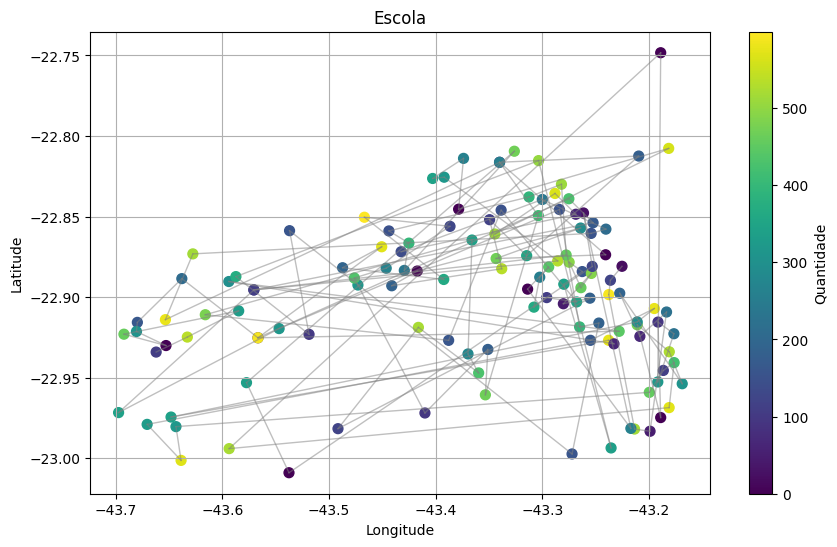

<Figure size 640x480 with 0 Axes>

In [168]:

# Extrair coordenadas das escolas
lat = df_rotas['lat']
lon = df_rotas['lon']
quantidade = df_rotas['quantidade']

#Plotando
plt.figure(figsize=(10, 6))
plt.scatter(lon, lat, c=quantidade, cmap='viridis', marker='o', s=50)

# Barra de cores
plt.colorbar(label='Quantidade')

for i in range(1, len(df_rotas)):
    plt.plot([df_rotas.iloc[i-1]['lon'], df_rotas.iloc[i]['lon']],
             [df_rotas.iloc[i-1]['lat'], df_rotas.iloc[i]['lat']],
             color='gray', linestyle='-', linewidth=1, alpha=0.5)

# Título e rótulos dos eixos
plt.title('Escola')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


plt.grid(True)
plt.show()

plt.savefig('rota.png')